In [ ]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
test_survived=pd.read_csv("data/gender_submission.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



# **Exploratory Data Analysis (EDA)**


In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [145]:
# What fraction of each Pclass has cabins?
print(train_df.groupby('Pclass')['Cabin'].apply(lambda x: x.notnull().mean()))

# Survival rate by 'Cabin' feature
print(train_df.groupby(train_df['Cabin'].notnull())['Survived'].mean())




Pclass
1    0.814815
2    0.086957
3    0.024440
Name: Cabin, dtype: float64
Cabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64


In [146]:
print(train_df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [147]:
print(train_df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [148]:
print(train_df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

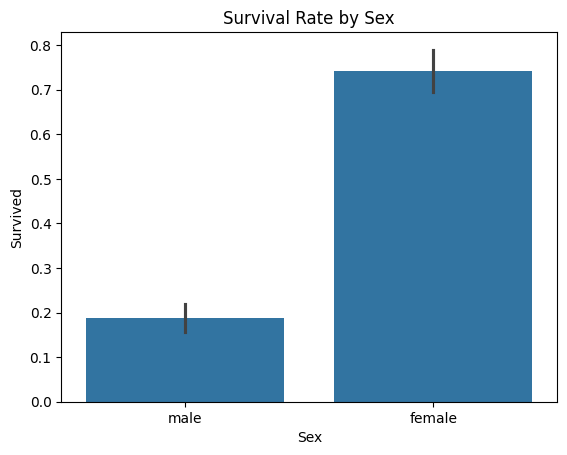

In [150]:
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()


In [151]:
max_age = train_df['Age'].max()
print(max_age)


80.0


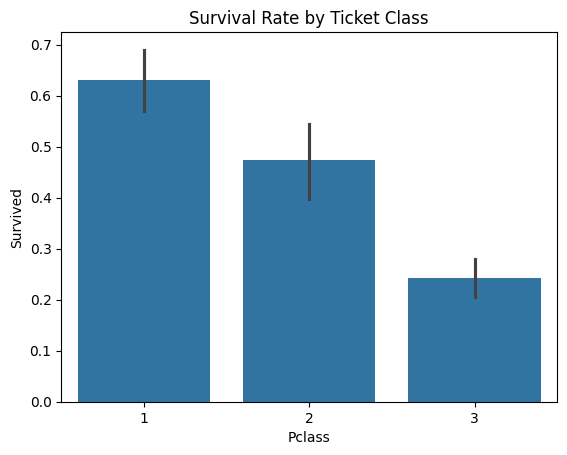

In [152]:
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Ticket Class')
plt.show()


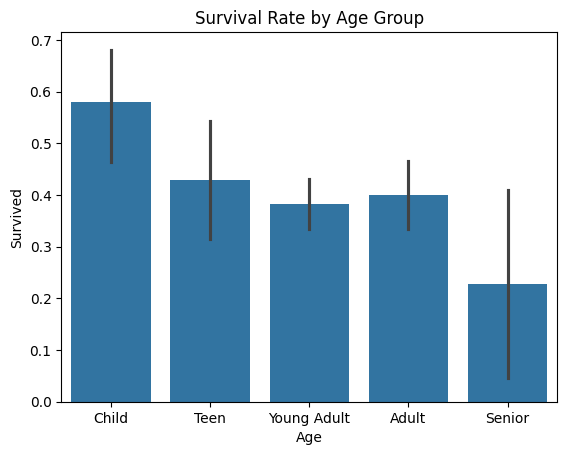

In [153]:
age_groups= pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 80],
                              labels=['Child', 'Teen', 'Young Adult', 'Adult','Senior'])

sns.barplot( x=age_groups, y=train_df['Survived'])
plt.title('Survival Rate by Age Group')
plt.show()


In [154]:
# look at te survival rate by sex, age , class
age_groups= pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 80],
                              labels=['Child', 'Teen', 'Young Adult', 'Adult','Senior'])
train_df.pivot_table('Survived',['Sex',age_groups],"Pclass")

<ipython-input-154-3f71026ab30a>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train_df.pivot_table('Survived',['Sex',age_groups],"Pclass")


Pclass                     1         2         3
Sex    Age                                      
female Child        0.000000  1.000000  0.478261
       Teen         1.000000  1.000000  0.550000
       Young Adult  0.972222  0.925000  0.500000
       Adult        0.972222  0.850000  0.142857
       Senior       1.000000       NaN  1.000000
male   Child        1.000000  1.000000  0.360000
       Teen         0.500000  0.000000  0.076923
       Young Adult  0.500000  0.074074  0.155844
       Adult        0.370370  0.037037  0.068182
       Senior       0.083333  0.333333  0.000000

In [155]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [156]:
test_survived

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [157]:
print(test_survived['Survived'].value_counts())

Survived
0    266
1    152
Name: count, dtype: int64


# **Data Preprocessing**

In [158]:
X_train=train_df.drop(['Survived'],axis=1)
y_train=train_df['Survived']
X_test=test_df
y_test=test_survived.drop(columns='PassengerId')

In [159]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder


In [160]:
ticket_counts_train = X_train['Ticket'].value_counts()
ticket_counts_test= X_test['Ticket'].value_counts()
ticket_counts_train

,count
Ticket,
1601,7
CA. 2343,7
347082,7
3101295,6
CA 2144,6
...,...
A/5 21172,1
349219,1
234818,1


In [161]:

X_train['TicketFreq'] =X_train['Ticket'].map(ticket_counts_train)
X_test['TicketFreq'] =X_test['Ticket'].map(ticket_counts_test)


In [162]:
# Create new features
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1
X_train['IsAlone'] = (X_train['FamilySize'] == 1).astype(int)

# Drop the originals
X_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)


In [163]:
# Create new features
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1
X_test['IsAlone'] = (X_test['FamilySize'] == 1).astype(int)

# Drop the originals
X_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)


In [164]:
bins=[0, 12, 18, 35, 60,80]
labels=['Child', 'Teen', 'Young Adult', 'Adult','Senior']

X_train['Age_Group'] = pd.cut(X_train['Age'], bins=bins, labels=labels)


In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          714 non-null    float64 
 5   Ticket       891 non-null    object  
 6   Fare         891 non-null    float64 
 7   Cabin        204 non-null    object  
 8   Embarked     889 non-null    object  
 9   TicketFreq   891 non-null    int64   
 10  FamilySize   891 non-null    int64   
 11  IsAlone      891 non-null    int64   
 12  Age_Group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [166]:
bins=[0, 12, 18, 35, 60,80]
labels=['Child', 'Teen', 'Young Adult', 'Adult','Senior']
X_test['Age_Group'] = pd.cut(X_test['Age'], bins=bins, labels=labels)


In [167]:
X_train['Deck'] = X_train['Cabin'].str[0]
X_test['Deck'] = X_test['Cabin'].str[0]



In [168]:
X_train['Title'] = X_train['Name'].str.extract(r',\s*([^\.]+)\.')
X_test['Title'] = X_test['Name'].str.extract(r',\s*([^\.]+)\.')



In [169]:
X_train.drop(columns=['Ticket','PassengerId','Name','Cabin'], inplace=True)
X_test.drop(columns=['Ticket','PassengerId','Name','Cabin'], inplace=True)


In [170]:
from sklearn.preprocessing import StandardScaler

# Fare has 1 null value in X_test

numerical_features_missing = ["Age","Fare"]

numerical_features_missing_transformer = Pipeline(steps=[

    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

In [171]:

TicketFreq_feature = ["TicketFreq"]

TicketFreq_transformer = Pipeline(steps=[
   #Assuming most people had individual tickets
    ("imputer", SimpleImputer(strategy="constant", fill_value=1)),
    ("scaler", StandardScaler())])

In [172]:
categorical_features = ["Sex","Embarked","Age_Group","Deck","Title"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknownsa
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [173]:


numerical_features = [ "Pclass", "FamilySize", "IsAlone"]

numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

In [174]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("num", numerical_transformer, numerical_features),
    ("Age",numerical_features_missing_transformer,numerical_features),
    ("ticket",TicketFreq_transformer,TicketFreq_feature),

])


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [176]:
# note that when u remove class_weight='balanced' from logistic regression you will get higher accurcy,
# but check the confusion metric you will know that you should add it even that the accuacy is lower

classification_models = {
    "LogisticRegression": LogisticRegression(solver='liblinear',class_weight='balanced'),
    "RandomForestClassifier": RandomForestClassifier(random_state=42,),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}
classification_results ={}
y_pred_models={}


In [177]:
from sklearn.metrics import accuracy_score, f1_score


for model_name, model in classification_models.items():


    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])


    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)


    print(f"Accuracy{model_name}...")

    y_pred = model_pipeline.predict(X_test)
    y_pred_models[model_name]=y_pred
    classification_results[model_name] = accuracy_score(y_test, y_pred)







Fitting LogisticRegression...
AccuracyLogisticRegression...
Fitting RandomForestClassifier...
AccuracyRandomForestClassifier...
Fitting XGBoost...
AccuracyXGBoost...


In [178]:
classification_results

{'LogisticRegression': 0.8899521531100478,
 'RandomForestClassifier': 0.8516746411483254,
 'XGBoost': 0.8444976076555024}

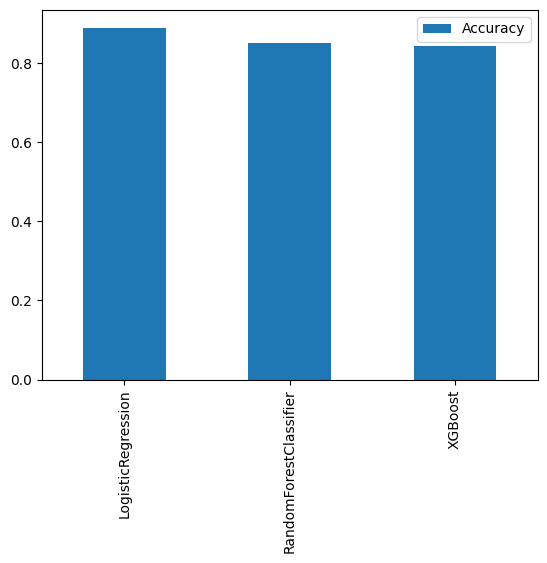

In [179]:
results_df = pd.DataFrame(classification_results.values(),
                          classification_results.keys(),
                          columns=["Accuracy"])
results_df.plot.bar();

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
for model_name, y_pred in y_pred_models.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {model_name}:\n{cm}\n")
    print(classification_report(y_test, y_pred))


Confusion matrix for LogisticRegression:
[[225  41]
 [  5 147]]

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       266
           1       0.78      0.97      0.86       152

    accuracy                           0.89       418
   macro avg       0.88      0.91      0.89       418
weighted avg       0.91      0.89      0.89       418

Confusion matrix for RandomForestClassifier:
[[234  32]
 [ 30 122]]

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       266
           1       0.79      0.80      0.80       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418

Confusion matrix for XGBoost:
[[228  38]
 [ 27 125]]

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       266
           1       0.77      0.82      0.79      

# **GridSearchCV for RandomForest**

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Build pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("RandomForestClassifier", RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    'RandomForestClassifier__n_estimators': [100, 200],
    'RandomForestClassifier__max_depth': [None, 5, 10],
    'RandomForestClassifier__min_samples_split': [2, 5],
    'RandomForestClassifier__min_samples_leaf': [1, 2],
    'RandomForestClassifier__max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Age_Group',
                                                                          'Deck',
                                                                          'Title']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Fami...
                                       ('RandomForestClassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RandomForestClassifier__max_depth': [None, 5, 10],
                         'RandomForestClassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'RandomForestClassifier__min_samples_leaf': [1, 2],
                         'RandomForestClassifier__min_samples_split': [2, 5],
                         'RandomForestClassifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [182]:

y_pred_random = grid_search_rf.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test,y_pred_random))
print("Classification Report:\n", classification_report(y_test, y_pred_random))

Test Accuracy: 0.9569377990430622
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.92      0.97      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418



In [183]:
confusion_matrix(y_test,y_pred_random)

array([[253,  13],
       [  5, 147]])

# GridSearchCV for xgboost

In [184]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", XGBClassifier(random_state=42, eval_metric='logloss'))
])

param_grid = {
    'xgb__n_estimators': [100],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__min_child_weight': [1, 5],
    'xgb__subsample': [0.8],
    'xgb__colsample_bytree': [0.8],
}

grid_search_xgb = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)




Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Age_Group',
                                                                          'Deck',
                                                                          'Title']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Fami...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8],
                         'xgb__learning_rate': [0.05, 0.1],
                         'xgb__max_depth': [3, 5],
                         'xgb__min_child_weight': [1, 5],
                         'xgb__n_estimators': [100], 'xgb__subsample': [0.8]},
             scoring='accuracy', verbose=2)

In [185]:

y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test,y_pred_xgb))
print("Classification Report:\n", classification_report(y_test,y_pred_xgb))

Test Accuracy: 0.9066985645933014
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       266
           1       0.86      0.89      0.87       152

    accuracy                           0.91       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.91      0.91      0.91       418



In [186]:
confusion_matrix(y_test,y_pred_xgb)

array([[244,  22],
       [ 17, 135]])

# **Voting Classifier**


In [187]:
from math import log
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline


best_rf = grid_search_rf.best_estimator_

log_model=Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(solver='liblinear',class_weight='balanced'))
])
# VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('logreg',log_model),
        ('random', best_rf),

    ],
    voting='hard' ,weights=[1,2]
)


# Fit on training data
voting_clf.fit(X_train, y_train)

# Evaluate
y_pred = voting_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("VotingClassifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


VotingClassifier Accuracy: 0.9569377990430622
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.92      0.97      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418



In [188]:
# it only increse TN 1
confusion_matrix(y_test,y_pred)

array([[253,  13],
       [  5, 147]])

In [189]:
final=pd.DataFrame(test_survived['PassengerId'])
final['Survived']=y_pred_random
final.to_csv("prediction.csv",index=False)

In [190]:
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
